## Handling Imbalanced Dataset
### 1 . up sampling
### 2. down sampling

In [27]:
import numpy as np
import  pandas as pd
from pygments.unistring import xid_continue

np.random.seed(123)

n_sample = 1000
class_0_ratio = 0.9
n_class_0 = int(n_sample * class_0_ratio)
n_class_1 = n_sample - n_class_0

In [28]:
n_class_0,n_class_1

(900, 100)

## CREATE MY DATAFRAME WITH IMBALANCED DATASET


In [29]:
class_0 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0,scale=1,size=n_class_0),
    "feature_2": np.random.normal(loc=0,scale=1,size=n_class_0),
    "target": [0] * n_class_0
})
class_1 = pd.DataFrame({
    "feature_1": np.random.normal(loc=2,scale=1,size=n_class_1),
    "feature_2": np.random.normal(loc=2,scale=1,size=n_class_1),
    "target": [1] * n_class_1
})

In [30]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [31]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [32]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [33]:
## upsampling
df_minority = df[df["target"] == 1]
df_majority = df[df["target"] == 0]

In [34]:
from  sklearn.utils import resample
df_minority_resample = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [50]:
df_minority_resample.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [36]:
pd.concat([df_minority_resample,df_majority])

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [37]:
df_minority_resample["target"].value_counts()

target
1    900
Name: count, dtype: int64

In [38]:
## downsample
import numpy as np

np.random.seed(123)
n_sample = 1000
class_0_ratio = 0.9
n_class_0 = int(n_sample * class_0_ratio)
n_class_1 = n_sample - n_class_0

In [39]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [40]:
class_0 = pd.DataFrame({
    "feature1": np.random.normal(loc=0,scale=1,size=n_class_0),
    "feature2": np.random.normal(loc=0,scale=1,size=n_class_0),
    "target": [0] * n_class_0
})
class_1 = pd.DataFrame({
    "feature1": np.random.normal(loc=2,scale=1,size=n_class_1),
    "feature2": np.random.normal(loc=2,scale=1,size=n_class_1),
    "target": [1] * n_class_1
})

In [41]:
df_minority = df[df["target"] == 1]
df_majority = df[df["target"] == 0]

In [42]:
from sklearn.utils import resample

df_minority_resample_down = resample(df_majority,replace=True,n_samples= len(df_minority),random_state=42)

In [43]:
df_minority_resample_down["target"].value_counts()

target
0    100
Name: count, dtype: int64

## SMOT(Synthetic minority oversampling technique)

In [44]:
from sklearn.datasets import make_classification

In [45]:
x,y=make_classification(n_samples=1000,
                    n_redundant=0,
                    n_features=2,
                    n_clusters_per_class=1,
                    weights=[0.90],
                    random_state=12,
                    )

In [46]:
import pandas as pd
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)

In [47]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


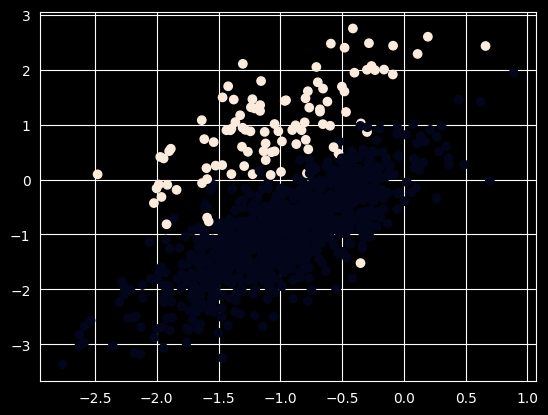

In [48]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [52]:
from imblearn.over_sampling import SMOTE

In [59]:
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [56]:
x.shape

(1000, 2)

In [57]:
y.shape

(1000,)

In [61]:
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df1,df2],axis=1)

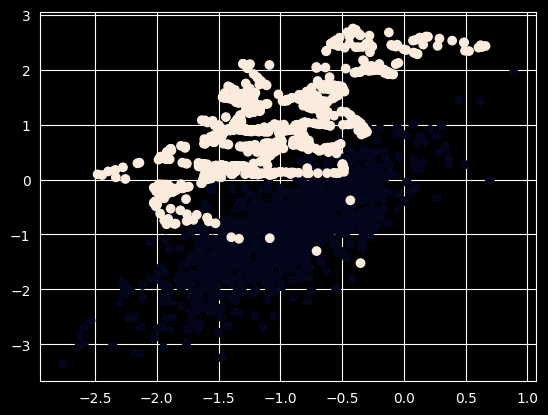

In [62]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])